In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

Load and Read the Dataset

In [ ]:
dataset = pd.read_csv("Language Detection.csv")

In [ ]:
dataset.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [ ]:
dataset['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [ ]:
X = dataset['Text']
y = dataset['Language']

In [ ]:
print(X)

0         Nature, in the broadest sense, is the natural...
1        "Nature" can refer to the phenomena of the phy...
2        The study of nature is a large, if not the onl...
3        Although humans are part of nature, human acti...
4        [1] The word nature is borrowed from the Old F...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Text, Length: 10337, dtype: object


In [ ]:
print(y)

0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10337, dtype: object


Preprocessing and Feature Extraction

In [ ]:
# Label Encoding
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Text Processing using Regular Expression
dataset_list = []
for Text in X:
    Text = re.sub(r'[!@#$(),\n"%^&*:;~0-9]', ' ', Text)
    Text = re.sub('[\[\]]', ' ', Text)
    Text = Text.lower()
    dataset_list.append(Text)

In [ ]:
# TF-IDF
tfidf_v = TfidfVectorizer()
X = tfidf_v.fit_transform(dataset_list)

In [ ]:
X.shape

(10337, 39404)

Train Text Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train)

  (0, 31779)	0.4341932448578063
  (0, 32653)	0.4341932448578063
  (0, 32039)	0.39253574277704034
  (0, 31022)	0.3193655568809602
  (0, 30030)	0.2563401892503319
  (0, 30793)	0.30154207191143134
  (0, 31969)	0.37723864065695334
  (0, 30727)	0.260627853841543
  (1, 16492)	0.31239627338959924
  (1, 17691)	0.31239627338959924
  (1, 13771)	0.31239627338959924
  (1, 14942)	0.2764604859681477
  (1, 27417)	0.25663368482063764
  (1, 2931)	0.24874523454815958
  (1, 14943)	0.2764604859681477
  (1, 16627)	0.18509419570671992
  (1, 10348)	0.23396072731842496
  (1, 25170)	0.22977927685466226
  (1, 879)	0.18315044591626098
  (1, 11576)	0.1603206048358512
  (1, 13319)	0.44516616561377115
  (1, 15350)	0.16557224451364014
  (2, 25183)	0.7050532512964321
  (2, 14081)	0.6027111700033899
  (2, 15350)	0.37368323268441533
  :	:
  (8268, 35735)	0.20966320605380306
  (8268, 36324)	0.20966320605380306
  (8268, 34976)	0.19444636332691478
  (8268, 35224)	0.20966320605380306
  (8268, 33520)	0.20966320605380306
  (

In [ ]:
print(y_train)

[12  2  2 ... 12 11  0]


In [ ]:
print(X_test)

  (0, 12413)	0.28994938674082216
  (0, 7070)	0.2621309733395998
  (0, 23072)	0.26890556937374166
  (0, 15661)	0.5242619466791996
  (0, 1518)	0.26890556937374166
  (0, 996)	0.4821743119450385
  (0, 11688)	0.20577411727249997
  (0, 4638)	0.3063356339577471
  (0, 4016)	0.21450809060781378
  (0, 25226)	0.1142602762157799
  (1, 37826)	0.6232848892972968
  (1, 37701)	0.44505958952486846
  (1, 37948)	0.4057412313195888
  (1, 37499)	0.3930044098349375
  (1, 37664)	0.3071799075512078
  (2, 11840)	0.332988788540019
  (2, 5559)	0.332988788540019
  (2, 16994)	0.332988788540019
  (2, 372)	0.332988788540019
  (2, 17043)	0.3010410755901772
  (2, 25715)	0.25449446174365065
  (2, 12358)	0.24783306307472094
  (2, 4439)	0.2627364755100816
  (2, 16002)	0.22683740500392613
  (2, 25046)	0.2627364755100816
  :	:
  (2067, 36100)	0.20125830766001762
  (2067, 34013)	0.1927138564879009
  (2067, 34051)	0.18194912109525596
  (2067, 35080)	0.18665147190288295
  (2067, 33590)	0.17204463614574822
  (2067, 35108)	0.18

In [ ]:
print(y_test)

[ 8 15  3 ...  3  8  0]


Naive Bayes and Prediction

In [ ]:
# Naive bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Prediction
y_pred = nb.predict(X_test)

Evaluation Metrics

In [ ]:
# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [ ]:
print('Accuracy : ', accuracy)
print('Precision :', precision)
print('Recall : ', recall)
print('F1 score : ', f1)

Accuracy :  0.9564796905222437
Precision : 0.982483029537764
Recall :  0.9367979741893876
F1 score :  0.9566161715544489


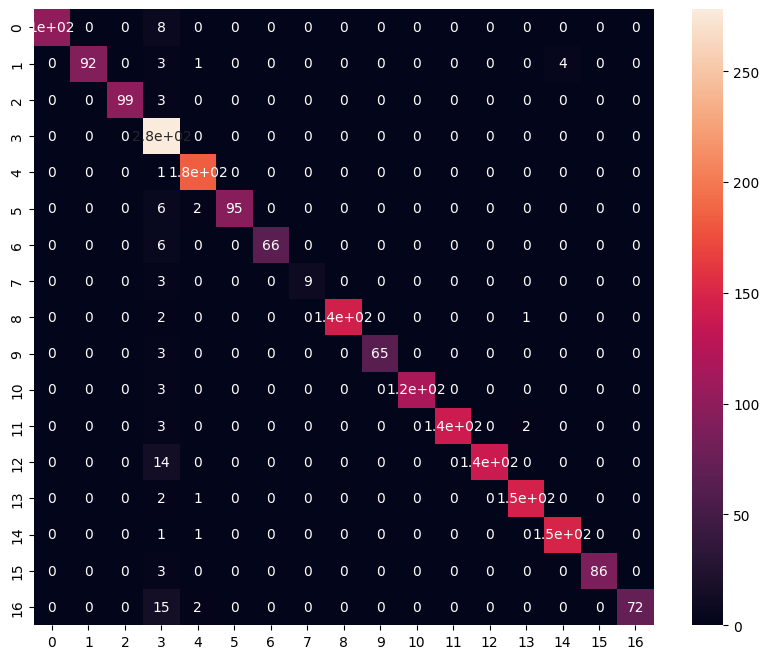

In [ ]:
# Confusion Matrix Visualization
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot = True)
plt.show()

In [ ]:
print('Classification report : ', cr)

Classification report :                precision    recall  f1-score   support

           0       1.00      0.93      0.96       108
           1       1.00      0.92      0.96       100
           2       1.00      0.97      0.99       102
           3       0.79      1.00      0.88       278
           4       0.96      0.99      0.98       185
           5       1.00      0.92      0.96       103
           6       1.00      0.92      0.96        72
           7       1.00      0.75      0.86        12
           8       1.00      0.98      0.99       147
           9       1.00      0.96      0.98        68
          10       1.00      0.97      0.99       120
          11       1.00      0.97      0.98       144
          12       1.00      0.91      0.95       152
          13       0.98      0.98      0.98       149
          14       0.97      0.99      0.98       150
          15       1.00      0.97      0.98        89
          16       1.00      0.81      0.89        89

 

Testing

In [ ]:
# Define the text strings
input_text = ["Bonjour", "My cat", "Jag bor i Sverige", "Привет", "¿Hablas español?", "Ciao bella", "Mein Name ist Andy", "Bir bira isterim", "ഹലോ"]

for text in input_text:
    # Vectorize the text string
    data = tfidf_v.transform([text])

    # Make the prediction
    prediction = nb.predict(data)

    # Define the language
    language_mapping = {
    0: "Arabic",
    1: "Danish",
    2: "Dutch",
    3: "English",
    4: "French",
    5: "German",
    6: "Greek",
    7: "Hindi",
    8: "Italian",
    9: "Kannada",
    10: "Malayalam",
    11: "Portuguese",
    12: "Russian",
    13: "Spanish",
    14: "Swedish",
    15: "Tamil",
    16: "Turkish",
    }

    # Get the predicted language label
    predicted_language = language_mapping[prediction[0]]

    # Result
    print("The detected language for '", text, "' is :", predicted_language)

The detected language for ' Bonjour ' is : French
The detected language for ' My cat ' is : English
The detected language for ' Jag bor i Sverige ' is : Swedish
The detected language for ' Привет ' is : Russian
The detected language for ' ¿Hablas español? ' is : Spanish
The detected language for ' Ciao bella ' is : Italian
The detected language for ' Mein Name ist Andy ' is : German
The detected language for ' Bir bira isterim ' is : Turkish
The detected language for ' ഹലോ ' is : Malayalam
